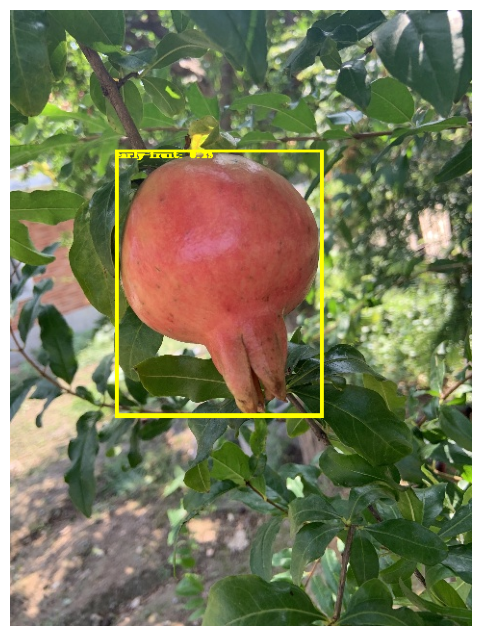

In [3]:
import torch
from transformers import OwlViTProcessor, OwlViTForObjectDetection
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

processor = OwlViTProcessor.from_pretrained('google/owlvit-base-patch32')
model = OwlViTForObjectDetection.from_pretrained('google/owlvit-base-patch32')

#image_path = "009015853.jpg"
#image_path = "008315441.jpg"
#image_path = "007123466.jpg"
#image_path = "004270114.jpg"
image_path = "009015854.jpg"

image = Image.open(image_path)
images = [image]

text_queries = [
    "bud",
    "flower",
    "early-fruit",
    "mid-growth",
    "ripe"
]

inputs = processor(text=text_queries, images=images, return_tensors="pt")
outputs = model(**inputs)

results = processor.post_process_object_detection(outputs=outputs, target_sizes=torch.Tensor([image.size[::-1]]), threshold=0.1)

draw = ImageDraw.Draw(image)
font = ImageFont.load_default()

for result in results:
    boxes, scores, labels = result['boxes'], result['scores'], result['labels']

    for box, score, label in zip(boxes, scores, labels):
        if score > 0.1:
            box = [round(b.item()) for b in box]
            label_text = text_queries[label]

            color = "grey"  # Default color
            if label_text == "bud": color = "green"
            elif label_text == "flower": color = "blue"
            elif label_text == "early-fruit": color = "yellow"
            elif label_text == "mid-growth": color = "orange"
            elif label_text == "ripe": color = "red"

            draw.rectangle(box, outline=color, width=3)
            text = f"{label_text}: {score:.2f}"
            draw.text((box[0], box[1]), text, fill=color, font=font)

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.show()
